In [0]:
import pandas as pd 
import numpy as np

In [0]:
data=pd.read_csv("train.csv")
dtest=pd.read_csv("test.csv")
sub=pd.read_csv('Sample_Sub.csv')
sub["User_ID"]=dtest["User_ID"]
sub["Product_ID"]=dtest["Product_ID"]

In [0]:
data.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [0]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.shape


(550068, 12)

In [0]:
data.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [0]:
  #df = data.groupby(by='Product_Category_2', as_index=False).agg({'User_ID': pd.Series.nunique})
data["Product_Category_2"]=data.Product_Category_2.fillna(1)
data["Product_Category_3"]=data.Product_Category_3.fillna(1)
dtest["Product_Category_2"]=dtest.Product_Category_2.fillna(1)
dtest["Product_Category_3"]=dtest.Product_Category_3.fillna(1)

In [0]:

data.shape
pur=data["Purchase"]
data=data.drop(labels='Purchase',axis=1)

In [0]:

data.shape
data['t']=1
dtest['t']=0

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
t                             550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
combined=pd.concat([data,dtest])

In [0]:
'''combined["Product_ID"],uniq=pd.factorize(combined["Product_ID"])
df=pd.get_dummies(combined['Gender'])
combined=pd.concat([combined,df],axis=1)
combined.pop('Gender')
combined.pop('F')
df1=pd.get_dummies(combined['City_Category'])
combined=pd.concat([combined,df1],axis=1)

df1=pd.get_dummies(combined['Stay_In_Current_City_Years'])
combined=pd.concat([combined,df1],axis=1)
combined['Product_ID']=le.fit_transform(combined['Product_ID'])
df1=pd.get_dummies(combined['Age'])
combined=pd.concat([combined,df1],axis=1)
combined.pop("C")
combined.pop("4+")
combined.pop("55+")
combined.pop("Age")
combined.pop("City_Category")
combined.pop("Stay_In_Current_City_Years")'''
condition = combined.index[(combined.Product_Category_1.isin([19,20])) & (combined.t == 1)]
combined = combined.drop(condition)
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list


In [0]:
df1=pd.get_dummies(combined['Stay_In_Current_City_Years'])
combined=pd.concat([combined,df1],axis=1)
combined["Product_ID"],uniq=pd.factorize(combined["Product_ID"])
combined['Gender']=le.fit_transform(combined.Gender)
combined['City_Category']=le.fit_transform(combined.City_Category)
combined['Stay_In_Current_City_Years'].replace(['0','1','2','3','4+'],[0,1,2,3,5],inplace=True)
#data['Product_ID']=le.fit_transform(data.Product_ID)
#data['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[10,20,30,40,48,53,60],inplace=True)
combined['Age']=le.fit_transform(combined.Age)

In [0]:
combined["User_ID_Count"] = getCountVar(combined, combined, "User_ID")
combined["Age_Count"] =getCountVar(combined, combined, "Age")
combined["Occupation_Count"] =getCountVar(combined, combined, "Occupation")
combined["Product_Category_1_Count"] =getCountVar(combined, combined,"Product_Category_1")
combined["Product_Category_2_Count"] =getCountVar(combined, combined, "Product_Category_2")
combined["Product_Category_3_Count"] =getCountVar(combined, combined,"Product_Category_3")
combined["Product_ID_Count"] =getCountVar(combined, combined, "Product_ID")

In [0]:
combined.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
t                             0
User_ID_Count                 0
Age_Count                     0
0                             0
1                             0
2                             0
3                             0
4+                            0
Occupation_Count              0
Product_Category_1_Count      0
Product_Category_2_Count      0
Product_Category_3_Count      0
Product_ID_Count              0
dtype: int64

In [0]:
data=combined[combined["t"]==1]
dtest=combined[combined["t"]==0]
data["Purchase"]=pur
data=data.drop(labels='t',axis=1)
dtest=dtest.drop(labels='t',axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:

combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,t,0,1,2,3,4+
0,1000001,0,0,0,10,0,2,0,3,0.0,0.0,1,0,0,1,0,0
1,1000001,1,0,0,10,0,2,0,1,6.0,14.0,1,0,0,1,0,0
2,1000001,2,0,0,10,0,2,0,12,0.0,0.0,1,0,0,1,0,0
3,1000001,3,0,0,10,0,2,0,12,14.0,0.0,1,0,0,1,0,0
4,1000002,4,1,6,16,2,5,0,8,0.0,0.0,1,0,0,0,0,1


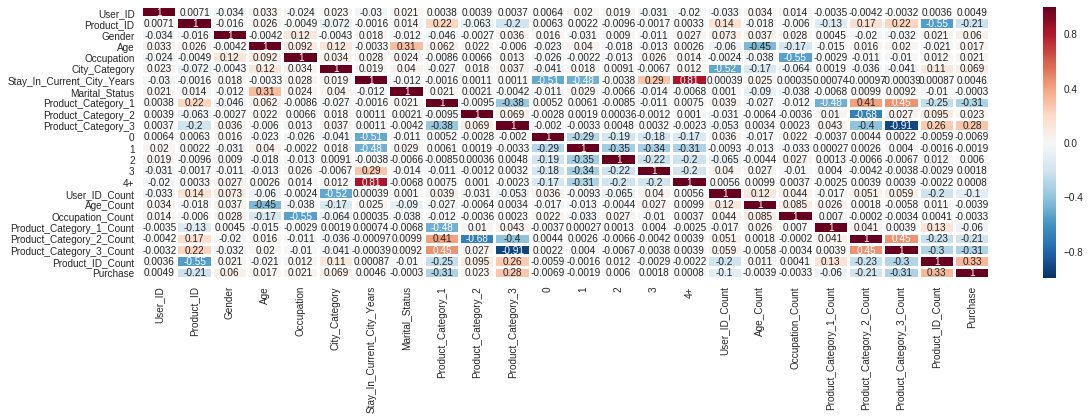

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (19,5))
sns.heatmap(data.corr(),annot = True,linewidths=2)

In [0]:
x=data.drop(labels='Purchase',axis=1)
y=data['Purchase']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=11)

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error as rm
from math import sqrt
e=rm(y_test,lr.predict(x_test))
e=sqrt(e)
e

4343.541995726972

In [0]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor( max_depth=11,n_estimators=20,random_state=11)
clf.fit(x_train,y_train)
e=rm(y_test,clf.predict(x_test))
e=sqrt(e)
e

2707.601739931501

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(RandomForestRegressor( max_depth=11,n_estimators=10,random_state=11),n_estimators=5)
ada.fit(x_train,y_train)
e=rm(y_test,ada.predict(x_test))
e=sqrt(e)
e

2765.932251481961

In [0]:

tree=DecisionTreeRegressor(max_depth=13,random_state=11)
Ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=11),n_estimators=10)
Ada.fit(x_train,y_train)
e=rm(y_test,Ada.predict(x_test))
e=sqrt(e)
e


2859.2434698491447

In [0]:
import xgboost as xgb
xg = xgb.XGBRegressor(objective ='reg:linear',eta=0.03, subsample=0.8,silent=1,colsample_bytree = 0.7, learning_rate = 0.3,max_depth = 10,seed=0, alpha = 10,min_child_weight = 10,num_rounds4 = 1100)
xg.fit(x_train,y_train)
e=rm(y_test,xg.predict(x_test))
e=sqrt(e)
e

2539.701101064108

In [0]:
dtest.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
User_ID_Count                 0
Age_Count                     0
0                             0
1                             0
2                             0
3                             0
4+                            0
Occupation_Count              0
Product_Category_1_Count      0
Product_Category_2_Count      0
Product_Category_3_Count      0
Product_ID_Count              0
dtype: int64

In [0]:
#dtest.pop("Stay_In_Current_City_Years")
#dtest.pop("Marital_Status")
#dtest.pop("Gender")
#dtest.pop("Product_ID")
#dtest.pop("Age")
#dtest.pop("Occupation")
#dtest.pop("City_Category")


In [0]:
d_pre=xg.predict(dtest)

In [0]:
sub["Purchase"]=d_pre
sub.head()
sub.describe()

,User_ID,Purchase
count,2.335990e+05,233599.000000
mean,1.003029e+06,9341.367188
std,1.726505e+03,4298.992188
min,1.000001e+06,-3327.278320
25%,1.001527e+06,6346.994629
50%,1.003070e+06,7851.845703
75%,1.004477e+06,12906.493652
max,1.006040e+06,23966.230469


In [0]:
sub[sub["Purchase"]<0]

,User_ID,Product_ID,Purchase
202,1000329,P00171342,-16.215258
328,1000566,P00212042,-1426.912231
569,1001010,P00156542,-170.766998
1207,1001912,P00085442,-331.646698
1829,1003015,P00135142,-62.604107
2932,1004643,P00030942,-41.671043
3554,1005686,P00102142,-1592.240112
4766,1001489,P00084042,-37.340549
4767,1001489,P00343442,-306.193085
6076,1003532,P00135142,-610.825989


In [0]:
sub["Purchase"][sub["Purchase"]<0]=12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
sub[sub["Purchase"]<0]

,User_ID,Product_ID,Purchase


In [0]:
sub[sub["Product_ID"]=="P00102142"]

,User_ID,Product_ID,Purchase
818,1001329,P00102142,0.041684
3554,1005686,P00102142,12.000000
4199,1000676,P00102142,181.164505
5358,1002414,P00102142,714.751343
6976,1004742,P00102142,382.438416
7293,1005256,P00102142,803.330933
7386,1005397,P00102142,12.000000
9555,1002793,P00102142,891.801941
9662,1002929,P00102142,1524.447876
12918,1001922,P00102142,281.475159


In [0]:
sub.to_csv('Sample_Sub.csv',index=False)

In [0]:
sub

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15375.118164
1,1000009,P00113442,11365.406250
2,1000010,P00288442,6835.815430
3,1000010,P00145342,1968.263306
4,1000011,P00053842,2353.071289
5,1000013,P00350442,9993.472656
6,1000013,P00155442,10832.213867
7,1000013,P0094542,7159.721680
8,1000015,P00161842,13366.559570
9,1000022,P00067942,5667.325684


In [0]:
sub.isnull().sum()

User_ID       0
Product_ID    0
Purchase      0
dtype: int64